Caso:

Se tiene un fichero csv con información relativa a datos de un estudio realizado
en la zona de Boston, donde se analizan diferentes variables, como son el
índice de crimen, el número de habitaciones, el porcentaje de habitantes de
clase baja y el valor medio de las casas de esa zona.

Pasos:
● Importar librerías a utilizar para el caso en cuestión (panda, matplotlib)
● Leer csv correspondiente.
● Renombrar campos.
● Confeccionar los siguientes Gráficos
o Histograma: Un histograma es útil para ver la distribución de una
variable, es decir, nos permite ver los valores más comunes. Para

el caso que se presenta se desea ver la distribución de la cantidad
media de habitaciones en el estudio realizado.

o Dispersión: sirve para representar la relación entre dos variables.
Para nuestro caso se desea ver la relación entre índice de crimen
y el valor mediano de las casas. En otras palabras, ¿el índice de
crimen afecta el valor medio de las casas?
o Barras: Un gráfico de barras es útil para comparar una variable
entre distintos grupos o categorías. Por ejemplo, si quisiéramos
observar el valor medio de cada ciudad. Para nuestro caso se
desea agrupar por ciudad y toma la media del valor mediano.
Gráfica las 10 primeras ciudades.
o Cajas: Los diagramas de cajas son útiles para representar grupos
de datos y compararlos entre ellos. Otro uso importante es que
nos permiten identificar de forma sencilla si una variable tiene
muchos outliers (valores atípicos) esto es, elementos que se
alejan de los valores frecuentes de dicha variable. Para nuestro
caso, se desea ver los valores atípicos de índice de crimen en los
diferentes cuantiles de valor mediano.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
boston_df = pd.read_csv('casasboston.csv', quoting=3)
#necesito eliminar esas comillas
boston_df.rename(columns={'"TOWN': 'TOWN', 'LSTAT"':'LSTAT'}, inplace=True)
boston_df[['TOWN', 'LSTAT']] = boston_df[['TOWN', 'LSTAT']].apply(lambda x: x.str.replace('"', ''))
boston_df.head(10)

,TOWN,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.9550,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.9500,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.9360,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.9280,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.9220,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,Marblehead,-70.9165,42.3040,28.7,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,Salem,-70.9360,42.2970,22.9,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,Salem,-70.9375,42.3100,22.1,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,Salem,-70.9330,42.3120,16.5,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,Salem,-70.9290,42.3160,18.9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1


In [2]:
mean_towns = boston_df.groupby('TOWN').agg({'MEDV':'mean'})
mean_towns_10 = mean_towns.head(10)

C:\Users\Jose Duarte\AppData\Local\Temp\ipykernel_18632\4224078062.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set_xticklabels(mean_towns_10.index, rotation=90) # necesitaba rotar el texto para que se mostrara correctamente


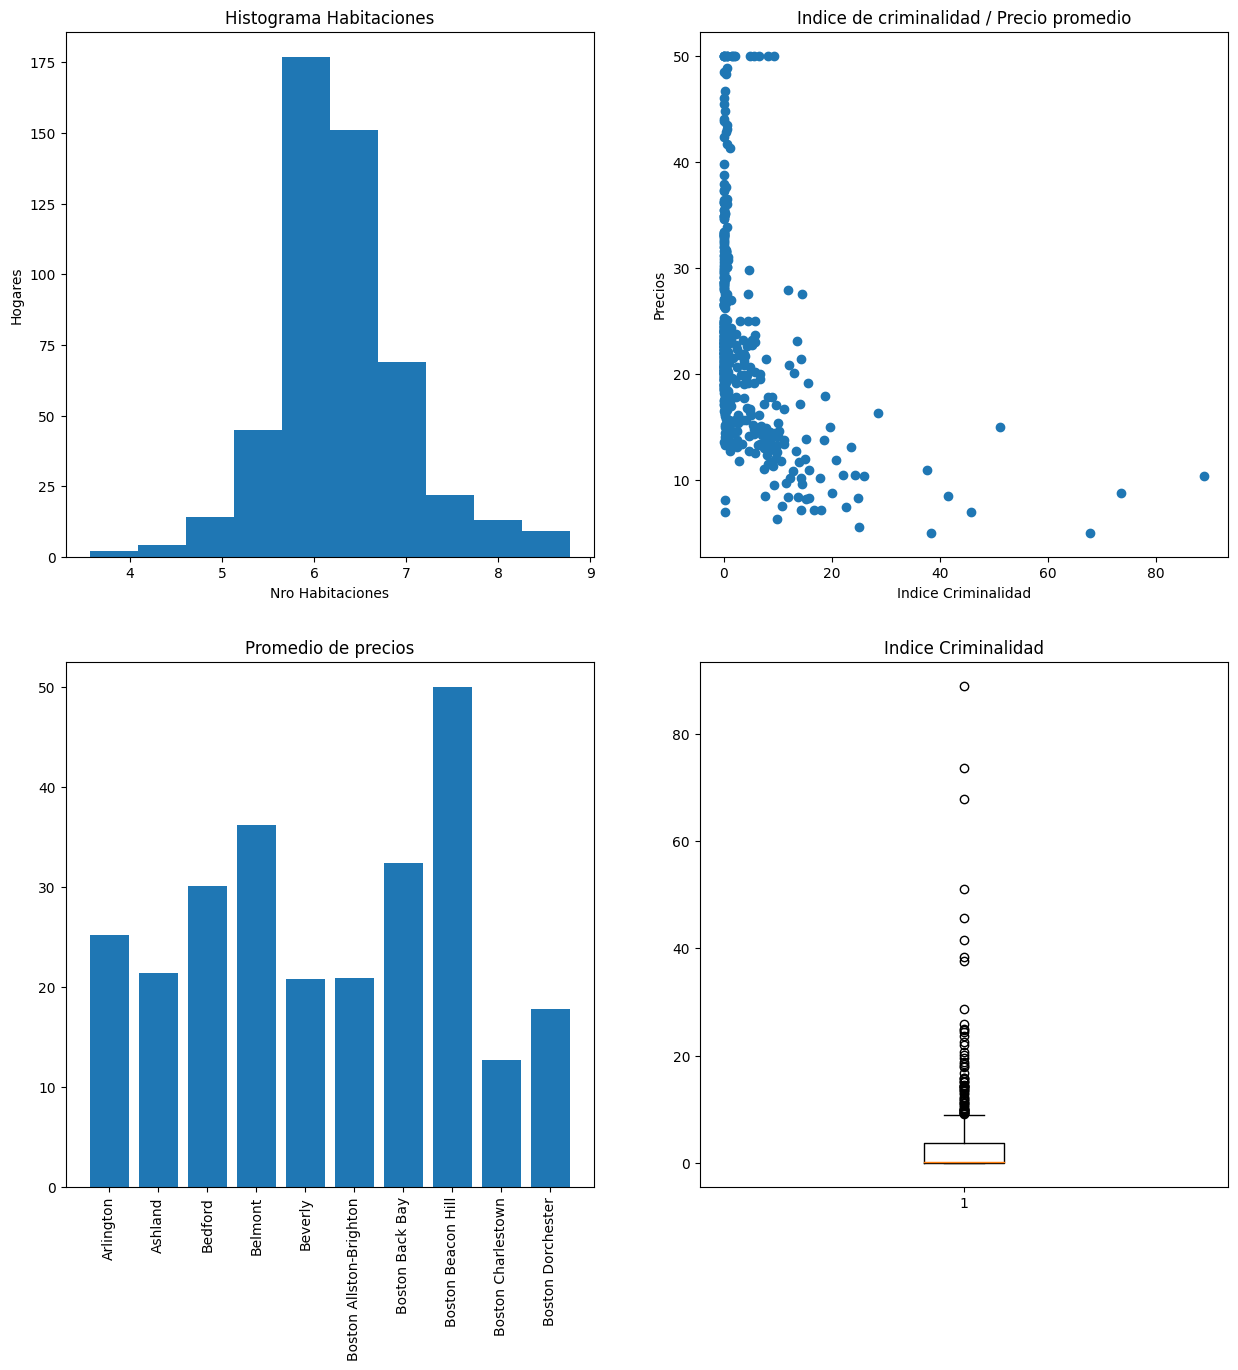

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15)) #creamos una especie de matriz para meter las graficas y les damos mas tamaño

axs[0, 0].hist(boston_df['RM'])
axs[0, 0].set_title('Histograma Habitaciones')
axs[0, 0].set_xlabel('Nro Habitaciones')
axs[0, 0].set_ylabel('Hogares')
axs[0, 1].scatter(boston_df['CRIM'], boston_df['MEDV'])
axs[0, 1].set_title('Indice de criminalidad / Precio promedio')
axs[0, 1].set_xlabel('Indice Criminalidad')
axs[0, 1].set_ylabel('Precios')
axs[1, 0].bar(mean_towns_10.index, mean_towns_10['MEDV'])
axs[1, 0].set_xticklabels(mean_towns_10.index, rotation=90) # necesitaba rotar el texto para que se mostrara correctamente
axs[1, 0].set_title('Promedio de precios')
axs[1, 1].boxplot(boston_df['CRIM'])
axs[1, 1].set_title('Indice Criminalidad')
plt.show()

En un principio pensaba que los graficos tenian algun error con la columna de criminalidad sin embargo despues comprendi que la disparidad entre algunos pueblos es enorme. He escuchado que en estados unidos los grupos etnicos y estrato social son extremadamente sectorizados, esto puede influir enormemente en los valores que algunos sitios que no llegan ni a 1 y otros lugares se multiplican exponencialmente, se puede ver la tendencia de precio y criminalidad hay un sector en el grafico de dispersion que esta practicamente vacio no hay practicamente precios debajo de 10 con un indice de criminalidad bajo, asi mismo los mayores indices se encuentran en este sector. Tambien me llama la atencion ese techito raro entre los precios mas altos y la incidencia de criminalidad, algo particularmente disruptivo debio pasar en muy poco tiempo. Habiendo tantos valores atipicos el grafico de caja no da mucha informacion se deberia conpartimentar un poco mas la informacion ya sea por sectores o algun otro detalle dado la gran distancia que tienen algunos valores con los cuartiles.